In [81]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# new with rules 
from rules_polypersonal_combo import preprocess_texts as polypersonal_preprocess


In [82]:
def split_document(text, max_length=250, overlap=50):
    # Split text into words
    words = text.split()
    parts = []
    if len(words) <= max_length:
        return [text]  # Return the entire text if it's short enough

    i = 0
    while i < len(words):
        # Ensure that we don't exceed the text length
        end_index = min(i + max_length, len(words))
        # Join the selected range of words back into a string
        chunk_text = " ".join(words[i:end_index])
        parts.append(chunk_text)
        i += (max_length - overlap)
    
    return parts

In [83]:
def load_data(directory_paths, use_polypersonal_tags=False, max_chunks=30):
    """
    Load data from directories. Optionally include polypersonal tags in chunks.
    """
    texts, labels = [], []
    for dialect, directory in directory_paths.items():
        for filename in os.listdir(directory):
            if not filename.endswith('.txt'):
                continue

            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='latin-1') as file:
                text = file.read().strip()
                text = re.sub(r'\d+', '', text)  # Remove numbers

                # Apply chunking
                chunks = split_document(text)
                for i, chunk in enumerate(chunks):
                    if i >= max_chunks:
                        break  # Limit chunks per file for balancing

                    if use_polypersonal_tags:
                        # Get tags for this chunk
                        chunk_tags_list = polypersonal_preprocess(chunk)
                        chunk_tags_str = " ".join(chunk_tags_list)
                        chunk = f"{chunk_tags_str} {chunk}"  # Append tags to chunk

                    texts.append(chunk)
                    labels.append(dialect)

    return texts, labels


def preprocess_texts_bayes(texts):
    # Define a tokenizer function
    def tokenize(text):
        # Simple tokenization based on whitespace
        return text.split()

    # Initialize a TF-IDF Vectorizer without using stop words
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    features = vectorizer.fit_transform(texts)
    return features, vectorizer



def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    # Weighted metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_test, preds, average="weighted"
    )
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Classification Report:\n", classification_report(y_test, preds))





In [84]:
# no bible data, only other and augmented data
directory_paths_no_bibles = {
    'inb': '../language_resources/no_bible_all_data_jan2025/inb',
    'qub': '../language_resources/no_bible_all_data_jan2025/qub',
    'quh': '../language_resources/no_bible_all_data_jan2025/quh',
    'quk': '../language_resources/no_bible_all_data_jan2025/quk',
    'qux': '../language_resources/no_bible_all_data_jan2025/qux',
    'quy': '../language_resources/no_bible_all_data_jan2025/quy',
    'quz': '../language_resources/no_bible_all_data_jan2025/quz', 
    'qwh': '../language_resources/no_bible_all_data_jan2025/qwh',
    'qxo': '../language_resources/no_bible_all_data_jan2025/qxo'
}

# texts, labels = load_data(directory_paths_no_bibles)
# features, vectorizer = preprocess_texts(texts)

# Load data WITHOUT tags
texts_no_tags, labels_no_tags = load_data(directory_paths_no_bibles, use_polypersonal_tags=False)
features_no_tags, vectorizer_no_tags = preprocess_texts(texts_no_tags)
print(f"Loaded {len(texts_no_tags)} texts and {len(labels_no_tags)} labels.")
print(f"Features shape: {features_no_tags.shape}")

# Train and evaluate without tags
print("\n===== Training WITHOUT Tags =====")
train_model(features_no_tags, labels_no_tags)

# Load data WITH polypersonal tags
texts_with_tags, labels_with_tags = load_data(directory_paths_no_bibles, use_polypersonal_tags=True)
features_with_tags, vectorizer_with_tags = preprocess_texts(texts_with_tags)
print(f"Loaded {len(texts_with_tags)} texts and {len(labels_with_tags)} labels.")
print(f"Features shape: {features_with_tags.shape}")

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Loaded 2073 texts and 2073 labels.
Features shape: (2073, 104467)

===== Training WITHOUT Tags =====
Accuracy: 0.7927710843373494
Precision: 0.7560703304616548
Recall: 0.7927710843373494
F1 Score: 0.755126126832475
Classification Report:
               precision    recall  f1-score   support

         quh       0.99      0.71      0.83       129
         quk       0.00      0.00      0.00         3
         qux       0.94      0.84      0.89        57
         quy       0.00      0.00      0.00         8
         quz       0.70      0.99      0.82       190
         qwh       0.00      0.00      0.00        14
         qxo       0.00      0.00      0.00        14

    accuracy                           0.79       415
   macro avg       0.38      0.36      0.36       415
weighted avg       0.76      0.79      0.76       415



/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Loaded 2073 texts and 2073 labels.
Features shape: (2073, 104467)


In [85]:
# print(f"Loaded {len(texts)} texts and {len(labels)} labels.")
# print(f"Features shape: {features.shape}")
# print(f"Number of labels: {len(labels)}")

In [86]:
# train_model(features, labels)
# Train and evaluate with tags
print("\n===== Training WITH Tags =====")
train_model(features_with_tags, labels_with_tags)


===== Training WITH Tags =====
Accuracy: 0.7879518072289157
Precision: 0.7534013707130136
Recall: 0.7879518072289157
F1 Score: 0.7506250783828596
Classification Report:
               precision    recall  f1-score   support

         quh       0.99      0.71      0.83       129
         quk       0.00      0.00      0.00         3
         qux       0.94      0.81      0.87        57
         quy       0.00      0.00      0.00         8
         quz       0.69      0.99      0.82       190
         qwh       0.00      0.00      0.00        14
         qxo       0.00      0.00      0.00        14

    accuracy                           0.79       415
   macro avg       0.37      0.36      0.36       415
weighted avg       0.75      0.79      0.75       415



/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.7879518072289157
Classification Report:
               precision    recall  f1-score   support

         quh       0.99      0.71      0.83       129
         quk       0.00      0.00      0.00         3
         qux       0.94      0.81      0.87        57
         quy       0.00      0.00      0.00         8
         quz       0.69      0.99      0.82       190
         qwh       0.00      0.00      0.00        14
         qxo       0.00      0.00      0.00        14

    accuracy                           0.79       415
   macro avg       0.37      0.36      0.36       415
weighted avg       0.75      0.79      0.75       415

Precision: 0.7534013707130136
Recall: 0.7879518072289157
F1 Score: 0.7506250783828596


/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 1000x1000 with 0 Axes>

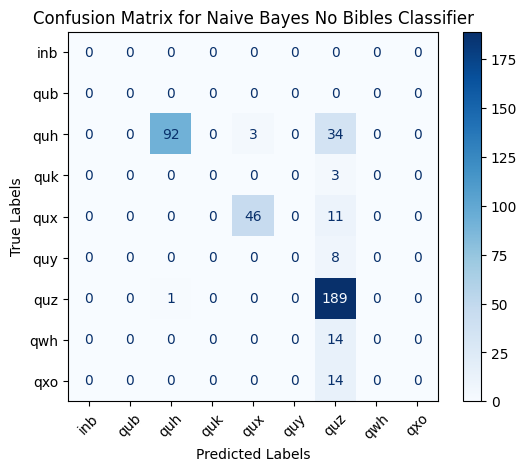

In [87]:
def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

        # Calculate precision, recall, F1 score, and support
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure(figsize=(10, 10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Naive Bayes No Bibles Classifier')
    plt.xticks(rotation=45)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

train_model(features_with_tags,labels_with_tags)

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume 'texts' and 'labels' are loaded and preprocessed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

model = MultinomialNB()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())


NameError: name 'texts' is not defined

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Assume 'texts' and 'labels' are loaded and prepared
vectorizer = TfidfVectorizer()
model = MultinomialNB()

# Create a pipeline
pipeline = make_pipeline(vectorizer, model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, texts, labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)

CV Scores: [0.72766885 0.81917211 0.72052402 0.63755459 0.77729258]


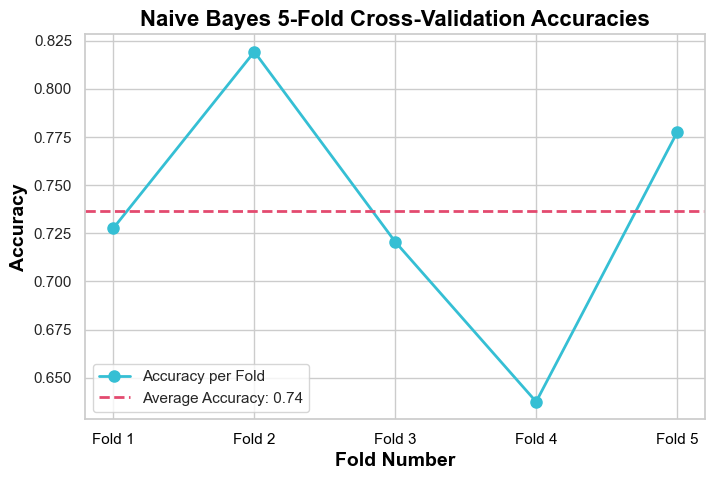

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # for a nicer styling

def plot_cv_scores(cv_scores):
    # Set the seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(figsize=(8, 5))  # Bigger size for better readability
    ax.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='#35BFD4', markersize=8, linewidth=2, label='Accuracy per Fold')
    
    # Adding average line
    avg_score = sum(cv_scores) / len(cv_scores)
    ax.axhline(y=avg_score, color='#E34A6F', linestyle='--', linewidth=2, label=f'Average Accuracy: {avg_score:.2f}')

    # Titles and labels
    ax.set_title('Naive Bayes 5-Fold Cross-Validation Accuracies', fontsize=16, fontweight='bold', color='black')
    ax.set_xlabel('Fold Number', fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold', color='black')
    ax.set_xticks(range(1, len(cv_scores) + 1))
    ax.set_xticklabels([f"Fold {i}" for i in range(1, len(cv_scores) + 1)], color='black')

    # Adding a legend
    ax.legend(loc='lower left')

    plt.show()

plot_cv_scores(cv_scores)


In [15]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt


report = classification_report(true_labels, predictions, target_names=directory_paths_no_bibles.keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)  # Drop averages/total
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report for Each Class')
plt.ylabel('Score')
plt.show()


NameError: name 'true_labels' is not defined